# 使用神经网络拟合一个简单的sin函数

In [1]:
import numpy as np
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def get_data(start, end, step):
    x = []
    y = []
    while start < end:
        x.append(start)
        y.append(math.sin(start))
        start += step
    return x, y

def draw_scatter(x, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='b', label='sin(x)', s = 0.5)
    pi_ticks = np.pi * np.array([0, 1/4, 1/2, 3/4, 1])
    pi_labels = ['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
    plt.xticks(pi_ticks, pi_labels)
    plt.title(title)
    plt.xlabel('x (in π units)')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

## 初始化一些训练数据，x的值从[0, pi]，y=sin(x)，这里没有引入观测误差

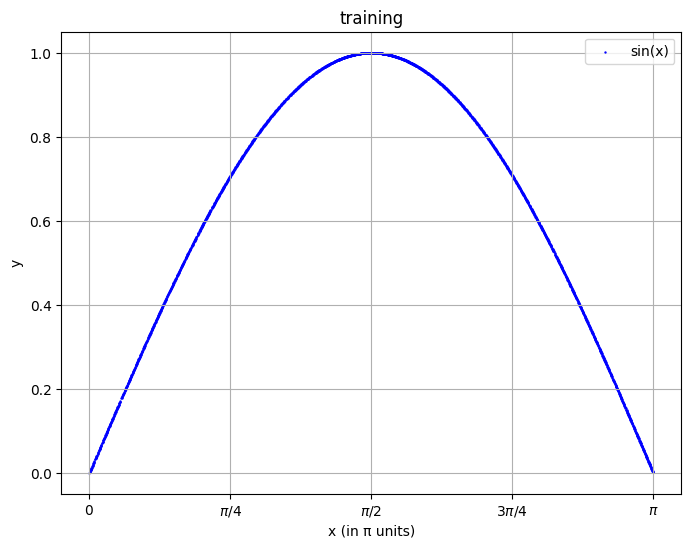

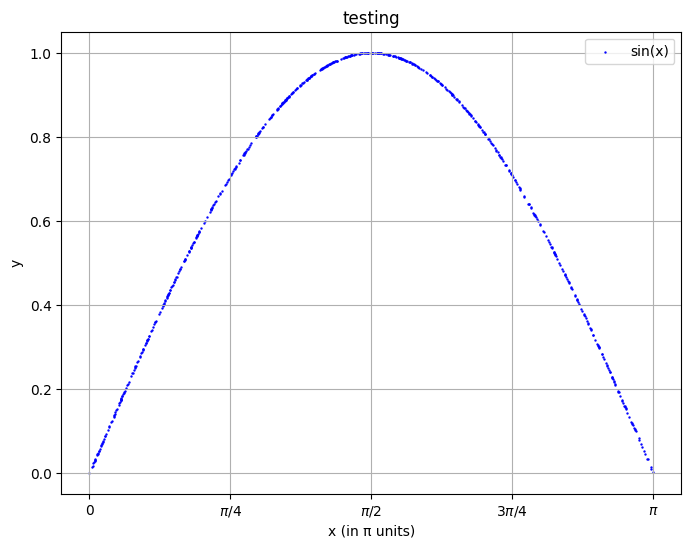

In [9]:
x,y = get_data(0, math.pi, 0.001)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

draw_scatter(x_train, y_train, 'training')
draw_scatter(x_test, y_test, 'testing')

## 定义简单的神经网络：这里有3个全连接层（参数层），两个中间隐藏层（中间结果层）

In [10]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [11]:
# 修改两个size，变成100，100，进行训练，然后查看下方结果
input_size = 1
hidden_size1 = 10
hidden_size2 = 10
output_size = 1

# 修改lr看看会有什么结果，改成0.001？ 0.01？ 0.5？ 1？
lr = 0.1

model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [12]:
# 可以先固定epoch
for epoch in range(5000):
    model.train()
    optimizer.zero_grad()
    
    x = torch.tensor(x_train, dtype=torch.float32).view(-1,1)
    target = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
    
    output = model(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.3969461917877197
Epoch 500, Loss: 0.0008359714411199093
Epoch 1000, Loss: 0.00029906464624218643
Epoch 1500, Loss: 0.00020654966647271067
Epoch 2000, Loss: 0.00017009318980854005
Epoch 2500, Loss: 0.0001340395538136363
Epoch 3000, Loss: 0.00012212354340590537
Epoch 3500, Loss: 0.00010809731611516327
Epoch 4000, Loss: 0.00013342792226467282
Epoch 4500, Loss: 9.69495449680835e-05


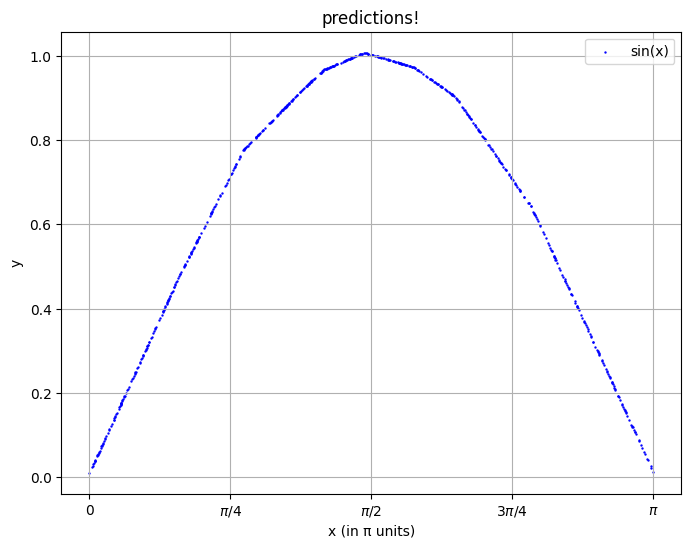

In [18]:
# 在测试集上看看结果：
model.eval()
with torch.no_grad():
    x = torch.tensor(x_test, dtype=torch.float32).view(-1,1)
    output = model(x)

y_pred = output.squeeze().detach().numpy()
draw_scatter(x_test, y_pred, "predictions!")

In [ ]:
def train(model, devices, batch_size, lr, num_epochs):
    train_iter, test_iter = read_dataset("dataset_name", batch_size)
    model = nn.DataParallel(model, device_ids=devices)
    optimizer = torch.optim.SGD(model.parameters(), lr)
    for epoch in range(num_epochs):
        model.train()
        for x,y in train_iter:
            optimizer.zero_grad()
            x,y = x.to(devices[0]), y.to(devices[0])
            l = loss(model(x), y)
            l.backward()
            optimizer.step()

In [13]:
def read_dataset(name, batch_size):
    return [],[]

In [3]:
import torch.nn as nn
import torch

loss = nn.MSELoss()
input = torch.tensor([0], dtype=torch.float32)
target = torch.tensor([3], dtype=torch.float32)
print(input)
print(target)
L = loss(input, target)
print(L)

tensor([0.])
tensor([3.])
tensor(9.)
